<a href="https://colab.research.google.com/github/akhileshkb/prml-notes/blob/master/Copy_of_Regression_PRML_IITDH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Programming Assignment :  Regression

Course Advisor: Prof. S.R.M. Prasanna

Course TA's: Jagabandhu Mishra (183081002@iitdh.ac.in) and 
             Seema K. (173021001@iitdh.ac.in)


Regression:

Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following.

1) Fitting of line (one variable learning)

2) Fitting of line (two variable learning) 

3) Fitting of a plane (two variable)

4) Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

5) Polynomial regression

6) Pratical example of regression task (salary prediction)

# 1) Fitting of line

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=10$ and $w_{1}=1$ and generate y

iii) Plot (x,y)



In [7]:
# write your code here
import random
import matplotlib.pyplot as plt
import numpy as np


In [1]:
def rand(start,end,num):
  r=[]
  for _ in range(num):
    r1 = random.randint(start*1000,end*1000)
    r2 = float(r1)/1000.0
    # print(r1,r2)
    r.append(r2)
  return r

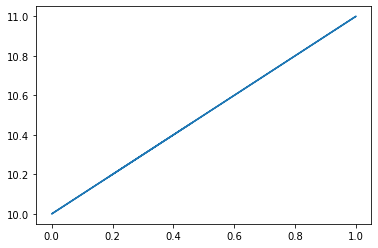

In [ ]:


x = rand(0,1,1000)
x = np.asarray(x)
w0 = 10
w1 = 1
y = w0 + w1*x
plt.plot(x,y)

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

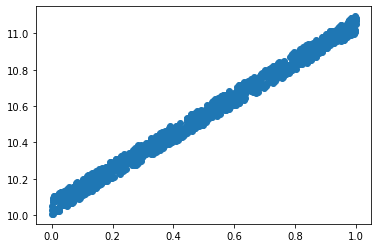

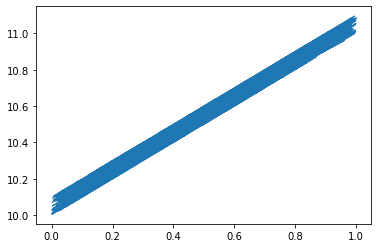

In [ ]:
# write your code here
noise = rand(0,1,1000)
noise = np.asarray(noise)
y_cor = w0 + w1*x + 0.1*noise
plt.scatter(x,y_cor)
plt.show()
plt.plot(x,y_cor)
plt.show()

c)  Curve prediction using hurestic way.

i) Keep $w_{0}=10$ as constant and find $w_{1}$ ?

ii) Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that.

iii) Find $y_{pred}$ using each value of $w_{1}$.

iv) The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$.

$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{cor_{i}}-y_{pred_{i}})^2$$

v) Plot error vs srch_$w1$

vi) First plot the scatter plot (x,$y_{cor}$) , over that plot (x,$y_{bestpred}$).

In [2]:
def uniform(start,end,num):
  r = []
  for i in range(num):
    r1 = float(start) + i*(float(end-start)/float(num))
    r.append(r1)
  return r

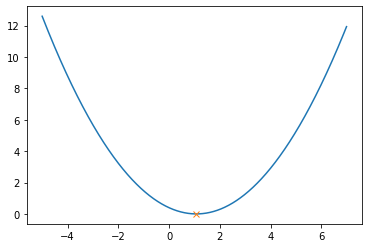

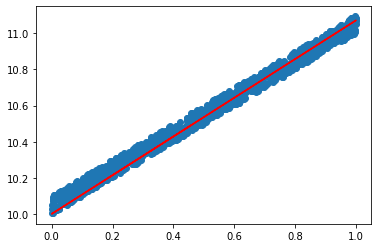

In [ ]:
# implementation of heurastic search for 1 variable case
# write your code here\


w0 = 10
w_1 = uniform(-5,7,1000)
w_1 = np.array(w_1)
best_w1 = w_1[0]
error_least = float('inf')
error = []
for w1 in w_1:
  y_pred = w0 + w1*x
  error1 = np.sum((y_pred - y_cor)**2)/1000.0
  error.append(error1)
  if error1<error_least:
    error_least = error1
    best_w1 = w1

y_pred = w0 + best_w1*x

plt.plot(w_1,error)
plt.plot(best_w1,error_least,marker = 'x')
plt.show()

plt.scatter(x,y_cor)
plt.plot(x,y_pred,'r')
plt.show()

d) Gradient descent

i) $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{cori}-(w_{0}+w_{1}x_{i}))^2$

ii) $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

iii) $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{cori}-y_{pred_{i}}) \times x_{i}$

In [14]:
# write your code here
def gradient_descent(params,eps,x,y,alpha,indexs):
  x1 = np.ones((x.shape[0],x.shape[1]+1))
  x1[:,1:] = x
  x = x1
  num = len(y)
  para=[]
  # para.append(params)
  error=[]
  error1 = 1000001.
  error2 = 1000000.
  epoch = 0
  while abs(error1-error2)>eps:
    epoch+=1
    y_pred = np.dot(x,params.transpose())
    error1 = np.sum((y-y_pred)**2)/num
    error.append(error1)

    # tmp = error_nxt
    # error_nxt = error1
    # error_init = tmp
    
    del_error = []
    for i in range((params.size)):
      # print(i)
      if i in indexs:
        x_i = x[:,i].reshape(num,1)
        del_error_i = -(np.sum(np.dot((y-y_pred).transpose(),x_i)))/num
        del_error.append(del_error_i)
      else :
        del_error_i = 0
        del_error.append(del_error_i) 

    del_error = np.array(del_error)
    params = params - alpha * del_error

    para.append(params)
    
    y_pred = np.dot(x,params.transpose())
    error2 = np.sum((y-y_pred)**2)/num
    # print(params)
  para = np.array(para)
  error = np.array(error)
  return params,para,error,epoch

1000
[[10.          1.00976675]]


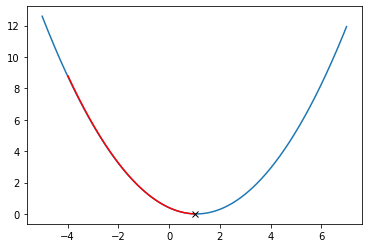

In [ ]:
w = np.array([[10,-4]])
num = 1000
alpha = 0.01
x = x.reshape(num,1)
y_cor = y_cor.reshape(num,1)
print(len(y))
eps = 0.00001000
indexs = [1]
# y_cor = np.array(y_cor)
# print(y_cor[],y)
w,w1,e1,epoch = gradient_descent(w,eps,x,y_cor,alpha,indexs)
print(w)
w1 = w1.reshape(epoch,2)
plt.plot(w_1,error)
plt.plot(w1[:,1],e1,'r')
plt.plot(w[:,1],e1[epoch-1],'black',marker = 'x')
plt.show()

# 2) Fitting line with two unknown variables

a) Generation of line data ($y=w_{1}x+w_{0}$)

i) Generate x, 1000 points from 0-1.

ii) Take $w_{0}=5$ and $w_{1}=1.5$ and generate y

iii) Plot (x,y)

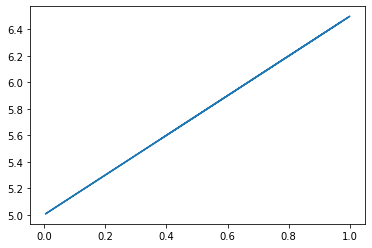

In [8]:
# write your code here
x = rand(0,1,1000)
x = np.array(x)
w_0 = 5
w_1 = 1.5
y = w_0 + w_1*x
plt.plot(x,y)
plt.show()

b) Corrupt the data using uniformly sampled random noise.

i) Generate random numbers uniformly from (0-1) with same size as y.

ii) Corrupt y and generate $y_{cor}$ by adding the generated randomsamples with a weight of 0.1.

iii) Plot (x,$y_{cor}$) (use scatter plot)

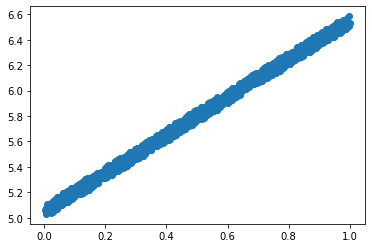

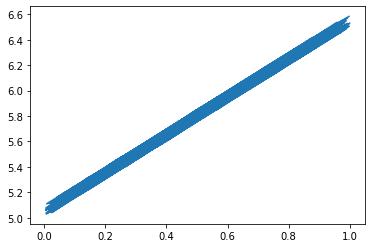

In [9]:
# write your code here
noise = rand(0,1,1000)
noise = np.asarray(noise)
y_cor = w_0 + w_1*x + 0.1*noise
plt.scatter(x,y_cor)
plt.show()
plt.plot(x,y_cor)
plt.show()

c) Plot the error surface

we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)

i) take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface.

In [11]:
import mpl_toolkits.mplot3d
num=1000
# write your code here
w0 = uniform(-10,10,1000)
w1 = uniform(-10,10,1000)
error = []
for w_0 in w0:
  e2 = []
  for w_1 in w1:
    y1 = w_0 + w_1*x 
    e1 = np.sum((y_cor-y1)**2)/num
    e2.append(e1)
  error.append(e2)

error = np.array(error)
print(error.shape)
# error = error.reshape(1000,1)

(1000, 1000)


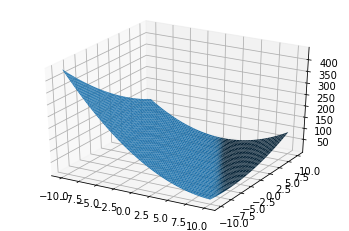

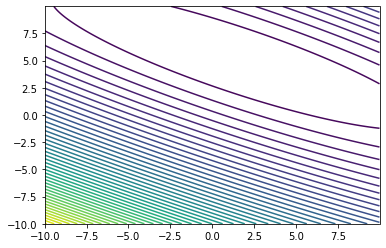

In [12]:
w_0, w_1 = np.meshgrid(w0, w1)


ax = plt.axes(projection='3d')
ax.plot_surface(w_1,w_0, error)
plt.show()

plt.contour(w0,w1,error,levels = 50)
plt.show()

d) Gradient descent:

[5.0547047] [1.48986653]


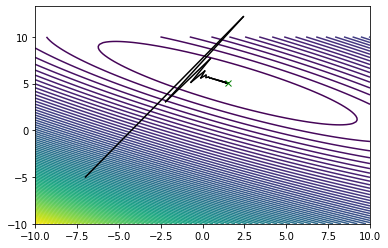

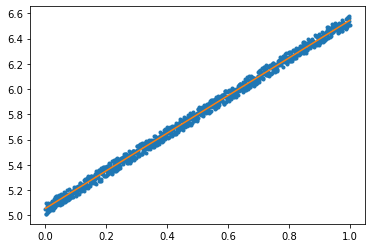

In [ ]:
# Gradient descent
w1_init = -7 # initialization 
w0_init = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001

# write your code here

In [15]:
w1_init = -7 # initialization 
w0_init = -5
lr = 0.6  # learning rate (0.9 diverges, 0.6 quite interesting)
eps = 0.000001
w = np.array([[-7,-5]])
indexs = [0,1]
x = x.reshape(num,1)
y_cor = y_cor.reshape(num,1)
print(x.shape)
w,w11,e1,epoch = gradient_descent(w,eps,x,y_cor,lr,indexs)
print(w11.shape)
print(w)

(1000, 1)
(40, 1, 2)
[[5.05874544 1.4841431 ]]


(40, 1)


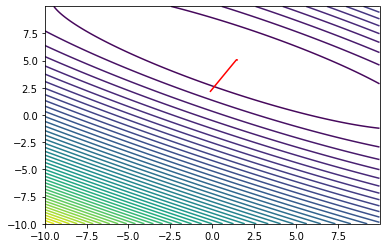

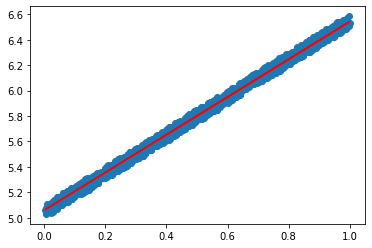

In [18]:
w11 = w11.reshape(epoch,2)
print(w11[:,1].reshape(epoch,1).shape)
# w0_, w1_ = np.meshgrid(w11[:,0].reshape(76,1), w11[:,1].reshape(76,1))


# ax = plt.axes(projection='3d')
# ax.plot_surface(w0_,w1_, error)
# plt.show()
# e1 = e1.reshape(76,1)
# plt.contour(w11[:,0].reshape(76,1),w11[:,1].reshape(76,1),e1)
# plt.show()
plt.contour(w0,w1,error,levels = 50)
w0_gd = w11[:,0].reshape(epoch,1)
w1_gd = w11[:,1].reshape(epoch,1)
# print(w0_gd)
plt.plot(w1_gd,w0_gd,'r')
# y_pred = w[0] + w[1]*x
plt.show()
y_pred = w[0,0] + w[0,1]*x
plt.scatter(x,y_cor)
plt.plot(x,y_pred,'r')
plt.show()

#  3. Fitting of a plane (two variables)

Here, we will try to fit plane using multiveriate regression

i) Generate x1 and x2 from range -1 to 1, (30 samples)

ii) Equation of plane $y=w0+w1x1+w2x2$

iii) Here we will fix w0 and will learn w1 and w2 

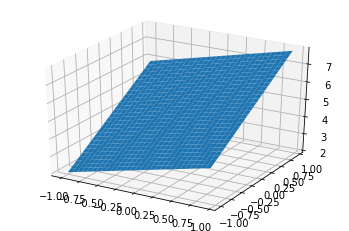

In [ ]:
# write your code here
import numpy as np
import matplotlib.pyplot as plt


def uniform(start,end,num):
  r = []
  for i in range(num):
    r1 = float(start) + i*(float(end-start)/float(num))
    r.append(r1)
  return r
x1 = uniform(-1,1,30)
x2 = uniform(-1,1,30)
x1 = np.asarray(x1)
x2 = np.asarray(x2)
w0 = 5
w1 = 1
w2 = 2
y=[]
for x_1 in x1:
  y1=[]
  for x_2 in x2:
    y1.append(w0 + w1*x_1 + w2*x_2)
  y.append(y1)
y = np.array(y)
# y = w0 + w1*x1 + w2*x2
X1, X2 = np.meshgrid(x1, x2)
Y = w0 + X1*w1 + X2*w2
ax = plt.axes(projection='3d')
# ax.scatter(x1,x2,Y)
# plt.show()
ax.plot_surface(X1,X2,Y)
plt.show()

b) Generate Error surface

(100, 100)
(100, 100)


Text(0, 0.5, 'w1')

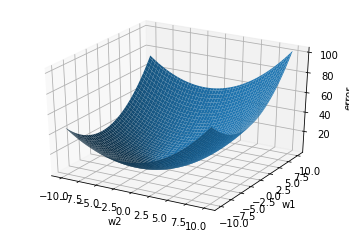

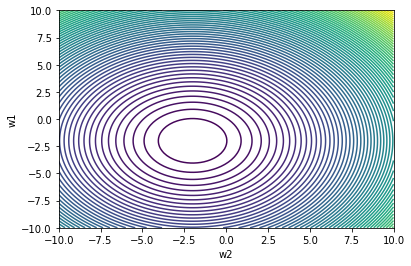

In [ ]:
# write your code here
w1 = uniform(-10,10,1000)
w2 = uniform(-10,10,1000)
# level = uniform(1,10,10)

error = []
for w_1 in w1:
  e2 = []
  for w_2 in w2:
    y1 = w0 + w_1*X1 +w_2*X2 
    e1 = np.sum((y-y1)**2)/900
    e2.append(e1)
  error.append(e2)
error = np.array(error)

w_1, w_2 = np.meshgrid(w1, w2)




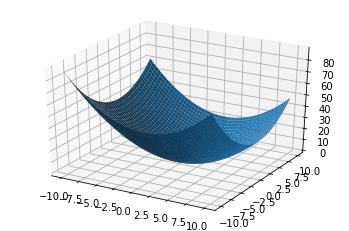

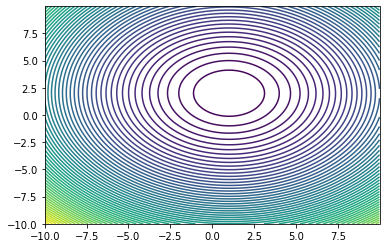

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_surface(w_1,w_2, error)
plt.show()

plt.contour(w_1,w_2,error,70)
plt.show()
# print(e1.shape)

c) Gradient descent:

In [ ]:
y = w0 + 1*X1 + 2*X2
print(y.shape)
# y = y.reshape(30,1)

(30, 30)


In [ ]:
# write your code here
xnew = [X1.reshape(900,1),X2.reshape(900,1)]
xnew = np.array(xnew).reshape(900,2)
ynew = y.reshape(900,1)
# xnew = xnew.T
print(xnew.shape)
w = np.array([5.,-6.,-4.])
eps = 0.00001
lr = 0.1
indexs = [1,2]
# w,w_gds,error1,epoch =  gradient_descent(w,eps,xnew,ynew,lr,indexs)

(900, 2)


In [ ]:
w[2]

-4

In [ ]:
 num=900
 w = np.array([5.,-6.,-4.])
 eps = 0.00001
 lr = 0.1
 X1 = X1.reshape(900,1)
 X2 = X2.reshape(900,1)
 y = w[0] + 1*X1 +2*X2
 error1 = 1000001.
 error2 = 1000000.
 error_gd=[]
 w1=[]
 w2=[]
 epoch=0
 while abs(error1-error2)>eps:
    epoch+=1
    # print(error1)
    y_pred = w[0] + w[1]*X1 + w[2]*X2
    w1.append(w[1])
    w2.append(w[2])
    error1 = np.sum((y-y_pred)**2)/num
    error_gd.append(error1)
    del_error_1 = -(np.sum(np.dot((y-y_pred).T,X1)))/num
    del_error_2 = -(np.sum(np.dot((y-y_pred).T,X2)))/num
    w[1] = w[1] - lr * del_error_1
    w[2] = w[2] - lr * del_error_2
    # print(w)
    y_pred = w[0] + w[1]*X1 + w[2]*X2
    error2 = np.sum((y-y_pred)**2)/num

In [ ]:
print(w)
print(epoch)

[5.         0.98482099 1.98707424]
180


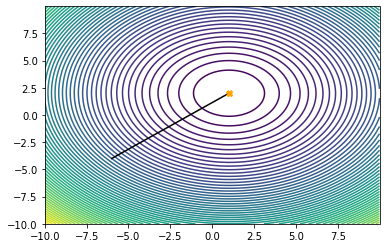

In [ ]:
plt.contour(w_1,w_2, error, levels = 70)
# plt.show()
plt.plot(w1, w2, 'black')
plt.plot(w[1],w[2], 'orange', marker = 'X')
plt.show()

# 4. Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)

Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

(5, 1000)
(6, 1)
(6, 1000)
(1000, 1)
[[1.05064532]
 [2.00131166]
 [3.00191194]
 [5.00097752]
 [9.00181937]
 [3.0029426 ]]
[[1.05024215]
 [2.00312913]
 [3.00073022]
 [4.99679046]
 [8.98578539]
 [2.99885205]]


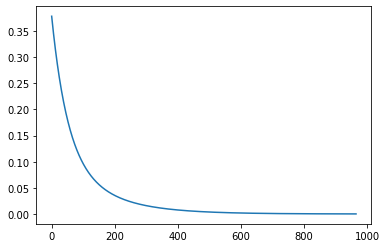

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
   # write your code here
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    return (np.sum(y - (x.T@w)))/(y.shape[0])

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)
    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    
    # write your code here
    eps = 0.000001
    w_old = np.random.rand(x.shape[0],1)
    error1 = 100001.
    error2 = 100000.
    err = []
    while (error1 - error2)>eps:
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err


############################################################################################################
# Generation of data
sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print(x.shape)

w=np.array([[1],[2],[3],[5],[9],[3]]) # W=[w0,w1,.....,wM]'
print(w.shape)

# # augment feat

x_aug=np.concatenate((np.ones((1,x.shape[1])), x),axis=0)
# print(x.shape)
print(x_aug.shape)


y=x_aug.T @ w  # vector multiplication
print(y.shape)


## corrupted by noise
nois=np.random.uniform(0,1,y.shape)
y=y+0.1*nois

### the data (x_aug and y is generated)#####
###############################################################################################################
# by computation (Normal equation)
reg=regression()
w_opt=reg.mat_inv(y,x_aug)
print(w_opt)

# by Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print(w_pred)

plt.plot(err)
  

    

# 5. Polynomial regression:

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. fit the generated curve using different polynomial order. (Using matrix inversion, and Home work using gradient descent)

In [ ]:
# x = rand(0,10,100)
# x = np.array(x)
# y = 0.25*(x**3) + 1.25*(x**2) - 3*x - 3

# x = x.reshape(100,1)

(100,)
[[14.66490769]]
[[14.66490769]
 [ 5.15887175]]
[[3.25964578]
 [5.15887175]
 [0.93161793]]
[[3.25964578]
 [0.86846205]
 [0.93161793]
 [0.19472278]]
[[3.27901488e+00]
 [8.68462048e-01]
 [9.26341700e-01]
 [1.94722776e-01]
 [1.67658836e-04]]


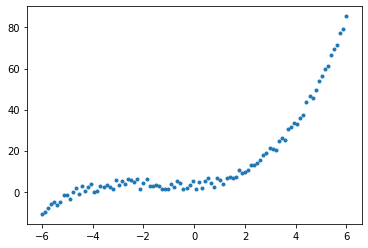

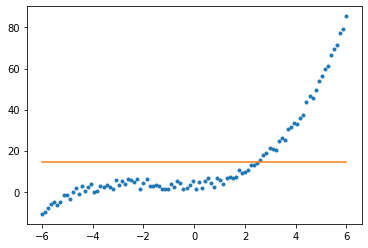

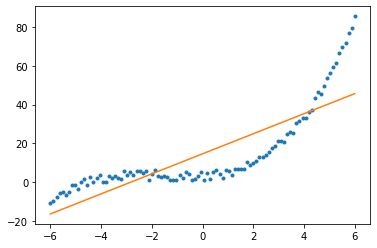

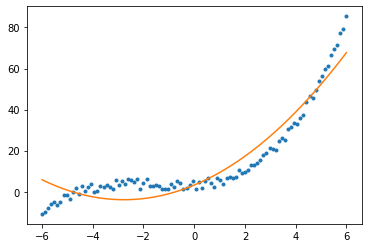

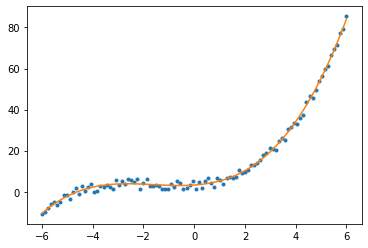

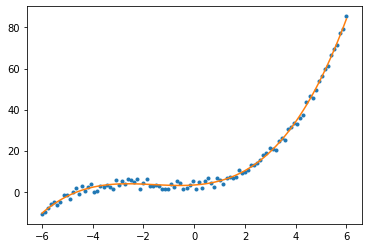

In [ ]:
## data generation

# write your code here
x = np.linspace(-6,6,100)
x = np.array(x)
y = 0.25*(x**3) + 1.25*(x**2) - 3*x - 3
w = np.random.rand(4,1)
print(x.shape)

def data_transform(X,degree): 
 # write your code here 
  x_new = []#X.reshape(1000,1)
  for x1 in x:
    j=[]
    for i in range(0,degree+1):
      j.append(x1**i)
      # print(x_new[:10])
    x_new.append(j)
  X_new = np.array(x_new)
  return X_new.T


X=data_transform(x,3)

y=X.T @ w

y=y+5*np.random.uniform(0,1,y.shape)

plt.plot(x.T,y,'.')

reg=regression()

# by computation

# for degree 0 polynomial fitting
degree=0
X_1=data_transform(x,degree)
# print(y.shape)
w_mat=reg.mat_inv(y,X_1)
# w_mat = X_1@X_1.T@X_1@y
# print(y.shape)
print(w_mat)
y_pred=X_1.T @ w_mat
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)
# plt.show()


# for degree 1 polynomial fitting
degree=1
# write your code here (like degree 0)
X_1=data_transform(x,degree)
# print(y.shape)
w_mat=reg.mat_inv(y,X_1)
# w_mat = X_1@X_1.T@X_1@y
# print(y.shape)
print(w_mat)
y_pred=X_1.T @ w_mat
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 2 polynomial fitting
degree=2
# write your code here
X_1=data_transform(x,degree)
# print(y.shape)
w_mat=reg.mat_inv(y,X_1)
# w_mat = X_1@X_1.T@X_1@y
# print(y.shape)
print(w_mat)
y_pred=X_1.T @ w_mat
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)



# for degree 3 polynomial fitting
degree=3
# write your code here
X_1=data_transform(x,degree)
# print(y.shape)
w_mat=reg.mat_inv(y,X_1)
# w_mat = X_1@X_1.T@X_1@y
# print(y.shape)
print(w_mat)
y_pred=X_1.T @ w_mat
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# for degree 4 polynomial fitting
degree=4
# write your code here
X_1=data_transform(x,degree)
# print(y.shape)
w_mat=reg.mat_inv(y,X_1)
# w_mat = X_1@X_1.T@X_1@y
# print(y.shape)
print(w_mat)
y_pred=X_1.T @ w_mat
# print(y_pred.shape)
plt.figure()
plt.plot(x.T,y,'.')
plt.plot(x.T,y_pred)

# xx=np.linalg.pinv((X_1 @ X_1.T)) @ X_1 @ y
# print(xx.shape)

# 6: Practical example (salary prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Perform using matrix inversion and using Gradiant descent  method
4. find the mean square error in test. (as performance measure) 

In [ ]:
import numpy as np

# write your code here

# mean square error (testing) (normalized) #############

error=reg.error(w_pred,y_test,aug(x_test))/((np.max(y_test)-np.mean(y_test))**2)

print('Normalized testing error=',error,'\n')

print('predicted salary=',y_pred[0:3],'\n')
print('actual salary=',y_test[0:3])



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
Normalized training error= 0.02827224237168212 

Normalized testing error= 0.05534340421775587 

predicted salary= [[33469.35497582]
 [52694.83918006]
 [58642.13537189]] 

actual salary= [[28084.]
 [48940.]
 [62952.]]
